In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from bisect import bisect

### Read data and check descriptive charactiristics

In [61]:
electricity_flow_df = pd.read_csv("./data/electricity_flow.csv")
inside_temperature_df = pd.read_csv("./data/inside_temperature.csv")

In [62]:
electricity_flow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999444 entries, 0 to 1999443
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   electricity   float64
 1   utc_datetime  object 
 2   user          object 
dtypes: float64(1), object(2)
memory usage: 45.8+ MB


In [63]:
electricity_flow_df.head()

,electricity,utc_datetime,user
0,901.0,2016-10-01 00:00:00,014dd64db3
1,1123.0,2016-10-01 00:01:00,014dd64db3
2,910.0,2016-10-01 00:02:00,014dd64db3
3,676.0,2016-10-01 00:03:00,014dd64db3
4,1115.0,2016-10-01 00:04:00,014dd64db3


In [64]:
electricity_flow_df.describe()

,electricity
count,1.999444e+06
mean,2.495489e+03
std,3.859061e+03
min,0.000000e+00
25%,5.500000e+02
50%,1.170000e+03
75%,2.541000e+03
max,6.299000e+04


In [65]:
inside_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495552 entries, 0 to 2495551
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   inside        float64
 1   utc_datetime  object 
 2   user          object 
dtypes: float64(1), object(2)
memory usage: 57.1+ MB


In [66]:
inside_temperature_df.head()

,inside,utc_datetime,user
0,22.120001,2016-10-01 00:00:00,014dd64db3
1,22.120001,2016-10-01 00:01:00,014dd64db3
2,22.120001,2016-10-01 00:02:00,014dd64db3
3,22.120001,2016-10-01 00:03:00,014dd64db3
4,22.110001,2016-10-01 00:04:00,014dd64db3


In [67]:
inside_temperature_df.describe()

,inside
count,2.495552e+06
mean,2.059301e+01
std,3.116162e+00
min,9.630000e+00
25%,1.929000e+01
50%,2.031000e+01
75%,2.144000e+01
max,6.362000e+01


In [68]:
inside_temperature_df["user"].value_counts()

7ebe99417b    86024
d25503e02c    85250
83a8f5417b    85007
884ee1acd9    84695
14210e75b9    84602
bb1130540f    84367
7a01185704    84313
43b58e1a39    84169
098405cc91    84109
5b5fdbdddf    83945
a7c6147a87    83928
28177f21a1    83917
24946c0715    83838
e3e4bd132d    83707
8150bfd2f3    83573
d2e36328ac    82985
f8c2b6b457    82984
6c62cd5594    82794
838fc20add    82586
e49772f37c    82549
e5c89ce6e3    82457
ac5b5e7eba    82426
6b9930c84e    82224
ca840c65e3    81865
f6e17b16fa    81822
baaa89965e    81777
cf296158e2    81708
55946035c2    81583
014dd64db3    81066
79a778d605    79282
Name: user, dtype: int64

In [69]:
inside_temperature_df["user"].nunique()

30

In [70]:
electricity_flow_df["user"].value_counts()

bb1130540f    87519
43b58e1a39    87441
7a01185704    87047
e49772f37c    86991
098405cc91    86603
55946035c2    86562
ac5b5e7eba    85659
014dd64db3    85071
7ebe99417b    84323
f6e17b16fa    80821
baaa89965e    77572
79a778d605    75520
cf296158e2    72574
884ee1acd9    70439
d2e36328ac    68993
14210e75b9    65805
a7c6147a87    65738
83a8f5417b    58645
8150bfd2f3    57994
838fc20add    56998
f8c2b6b457    54647
5b5fdbdddf    54365
d25503e02c    51346
ca840c65e3    48778
e3e4bd132d    47167
e5c89ce6e3    45813
24946c0715    45399
28177f21a1    42059
6b9930c84e    41874
6c62cd5594    39681
Name: user, dtype: int64

In [71]:
electricity_flow_df["user"].nunique()

30

In [72]:
electricity_flow_df.isna().sum()

electricity     0
utc_datetime    0
user            0
dtype: int64

In [73]:
inside_temperature_df.isna().sum()

inside          0
utc_datetime    0
user            0
dtype: int64

In [74]:
electricity_flow_df["utc_datetime"] = pd.to_datetime(electricity_flow_df["utc_datetime"])
inside_temperature_df["utc_datetime"] = pd.to_datetime(inside_temperature_df["utc_datetime"])

electricity_flow_df.head()

,electricity,utc_datetime,user
0,901.0,2016-10-01 00:00:00,014dd64db3
1,1123.0,2016-10-01 00:01:00,014dd64db3
2,910.0,2016-10-01 00:02:00,014dd64db3
3,676.0,2016-10-01 00:03:00,014dd64db3
4,1115.0,2016-10-01 00:04:00,014dd64db3


In [75]:
inside_temperature_df.head()

,inside,utc_datetime,user
0,22.120001,2016-10-01 00:00:00,014dd64db3
1,22.120001,2016-10-01 00:01:00,014dd64db3
2,22.120001,2016-10-01 00:02:00,014dd64db3
3,22.120001,2016-10-01 00:03:00,014dd64db3
4,22.110001,2016-10-01 00:04:00,014dd64db3


### Create plots to understand the data

In [76]:
#Order by user and time the two dataframes
electricity_flow_df = electricity_flow_df.sort_values(by = ["user", "utc_datetime"])
inside_temperature_df = inside_temperature_df.sort_values(by = ["user", "utc_datetime"])

In [77]:
def plot_metric_over_hour(df, user, metric, time_start):
    user_example = df[(df["user"] == user) & (df["utc_datetime"] >= time_start) & (df["utc_datetime"] < time_start + dt.timedelta(hours=1))]

    plt.plot(user_example["utc_datetime"].dt.minute, user_example[metric])
    plt.ylabel(metric)
    plt.xlabel("minute")
    plt.title(f"{metric} over hour {time_start}")
    plt.show()


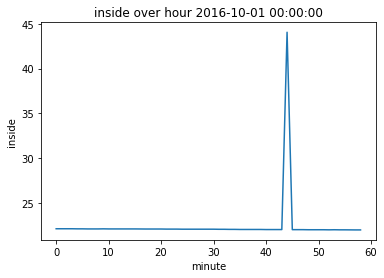

In [78]:
plot_metric_over_hour(inside_temperature_df, "014dd64db3", "inside", dt.datetime(2016, 10, 1, 0))

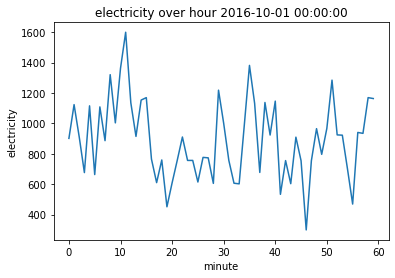

In [79]:
plot_metric_over_hour(electricity_flow_df, "014dd64db3", "electricity", dt.datetime(2016, 10, 1, 0))

In [80]:
inside_temperature_df[(inside_temperature_df["user"] == "014dd64db3")  & (inside_temperature_df["inside"] <= 18) & (inside_temperature_df["utc_datetime"] >= dt.datetime(2016, 11, 30, 13)) & (inside_temperature_df["utc_datetime"] < dt.datetime(2016, 11, 30, 15))]

,inside,utc_datetime,user
80420,17.920000,2016-11-30 13:00:00,014dd64db3
80421,17.910000,2016-11-30 13:01:00,014dd64db3
80422,17.900000,2016-11-30 13:02:00,014dd64db3
80423,17.889999,2016-11-30 13:03:00,014dd64db3
80424,17.889999,2016-11-30 13:04:00,014dd64db3
...,...,...,...
80510,17.850000,2016-11-30 14:39:00,014dd64db3
80511,17.870001,2016-11-30 14:40:00,014dd64db3
80512,17.900000,2016-11-30 14:41:00,014dd64db3
80513,17.930000,2016-11-30 14:42:00,014dd64db3


In [81]:
def plot_metric_over_interval(df, user, metric, time_start, time_end):
    user_example = df[(df["user"] == user) & (df["utc_datetime"] >= time_start) & (df["utc_datetime"] < time_end)]

    plt.plot(user_example["utc_datetime"], user_example[metric])
    plt.ylabel(metric)
    plt.xlabel("minute")
    plt.title(f"{metric} from {time_start} to {time_end}")
    plt.show()

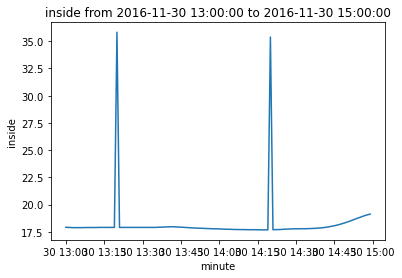

In [82]:
plot_metric_over_interval(inside_temperature_df, "014dd64db3", "inside", dt.datetime(2016, 11, 30, 13), dt.datetime(2016, 11, 30, 15))

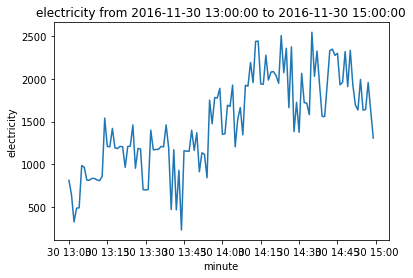

In [83]:
plot_metric_over_interval(electricity_flow_df, "014dd64db3", "electricity", dt.datetime(2016, 11, 30, 13), dt.datetime(2016, 11, 30, 15))

### Handle outliers with interpolation

In [84]:
inside_temperature_df[inside_temperature_df["inside"] >= 27]["inside"].count()

41731

In [85]:
#bad_idx = inside_temperature_df.index[inside_temperature_df['inside'].pct_change().abs().ge(0.3)]
bad_idx = inside_temperature_df.index[inside_temperature_df['inside'] >= 27]

In [86]:
bad_idx

Int64Index([     39,      84,     131,     183,     226,     274,     328,
                388,     441,     501,
            ...
            2495011, 2495070, 2495128, 2495188, 2495248, 2495308, 2495368,
            2495427, 2495484, 2495544],
           dtype='int64', length=41731)

In [87]:
outlier_idx = electricity_flow_df.index[electricity_flow_df['electricity'] >= 6000]
outlier_idx

Int64Index([    389,     390,     436,     479,     507,     508,     509,
                516,     517,     518,
            ...
            1999242, 1999243, 1999244, 1999246, 1999247, 1999248, 1999249,
            1999250, 1999252, 1999253],
           dtype='int64', length=193534)

In [88]:
def remove_outliers(df, col, threshold):
    outlier_idx = df.index[df[col] >= threshold]
    df.loc[outlier_idx, col] = np.nan
    df[col] = df[col].interpolate()
    return df

In [89]:
electricity_cutoff_threshold = 6000
temperature_cutoff_threshold = 27
electricity_flow_df = remove_outliers(electricity_flow_df, "electricity", electricity_cutoff_threshold)
inside_temperature_df = remove_outliers(inside_temperature_df, "inside", temperature_cutoff_threshold)

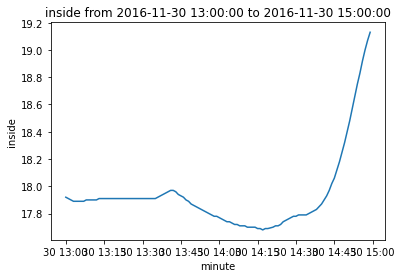

In [90]:
#Repeat inside temperature plot after removing outliers
plot_metric_over_interval(inside_temperature_df, "014dd64db3", "inside", dt.datetime(2016, 11, 30, 13), dt.datetime(2016, 11, 30, 15))

### Join and process dataframes

In [91]:
customer_df = inside_temperature_df.merge(electricity_flow_df, how = "left", on = ["user", "utc_datetime"])

In [92]:
customer_df.head()

,inside,utc_datetime,user,electricity
0,22.120001,2016-10-01 00:00:00,014dd64db3,901.0
1,22.120001,2016-10-01 00:01:00,014dd64db3,1123.0
2,22.120001,2016-10-01 00:02:00,014dd64db3,910.0
3,22.120001,2016-10-01 00:03:00,014dd64db3,676.0
4,22.110001,2016-10-01 00:04:00,014dd64db3,1115.0


In [93]:
customer_df.isna().sum()

inside               0
utc_datetime         0
user                 0
electricity     589143
dtype: int64

In [94]:
customer_df.isna().sum() /customer_df.size

inside          0.000000
utc_datetime    0.000000
user            0.000000
electricity     0.059019
dtype: float64

In [95]:
#Interpolate nulls on electricity after merge
customer_df["electricity"] = customer_df["electricity"].interpolate()
print(customer_df.isna().sum())

inside          0
utc_datetime    0
user            0
electricity     0
dtype: int64


In [96]:
customer_df["user"].nunique()

30

In [97]:
customer_df["user"].value_counts()

7ebe99417b    86024
d25503e02c    85250
83a8f5417b    85007
884ee1acd9    84695
14210e75b9    84602
bb1130540f    84367
7a01185704    84313
43b58e1a39    84169
098405cc91    84109
5b5fdbdddf    83945
a7c6147a87    83928
28177f21a1    83917
24946c0715    83838
e3e4bd132d    83707
8150bfd2f3    83573
d2e36328ac    82985
f8c2b6b457    82984
6c62cd5594    82794
838fc20add    82586
e49772f37c    82549
e5c89ce6e3    82457
ac5b5e7eba    82426
6b9930c84e    82224
ca840c65e3    81865
f6e17b16fa    81822
baaa89965e    81777
cf296158e2    81708
55946035c2    81583
014dd64db3    81066
79a778d605    79282
Name: user, dtype: int64

In [98]:
times = pd.DatetimeIndex(customer_df.utc_datetime)

customer_df.groupby(by = ["user", times.hour]).agg({"inside": ["mean", "median"],
                                                    "electricity": ["mean", "median"]})


inside             electricity             
                              mean     median         mean       median
user       utc_datetime                                                
014dd64db3 0             20.485675  20.670000   945.892684   861.000000
           1             20.240489  20.379999   891.654106   844.000000
           2             20.041368  20.170000   899.777396   847.000000
           3             19.857377  20.000000   920.584387   845.000000
           4             19.718935  19.850000   896.865556   833.500000
...                            ...        ...          ...          ...
f8c2b6b457 19            20.909917  21.000000  1609.938028  1342.666667
           20            20.771957  20.840000  1385.632804  1090.000000
           21            20.536996  20.600000  1373.006017   950.000000
           22            20.287817  20.320000  1009.310678   646.571429
           23            20.085194  20.139999   720.018867   470.000000

[720 rows x 4 columns]

In [99]:
quantiles_df = customer_df.groupby(by = ["user", times.hour]).quantile(np.linspace(0,1,21)).reset_index() #.drop("utc_datetime", axis = 1)

In [100]:
quantiles_df

,user,utc_datetime,level_2,inside,electricity
0,014dd64db3,0,0.00,17.910000,126.00
1,014dd64db3,0,0.05,18.700001,388.20
2,014dd64db3,0,0.10,19.209999,427.00
3,014dd64db3,0,0.15,19.400000,522.60
4,014dd64db3,0,0.20,19.670000,558.00
...,...,...,...,...,...
15115,f8c2b6b457,23,0.80,20.600000,849.75
15116,f8c2b6b457,23,0.85,20.650000,970.40
15117,f8c2b6b457,23,0.90,20.774001,1190.00
15118,f8c2b6b457,23,0.95,20.980000,2170.00


In [101]:
def add_year_month_day(df, time_col):
    df["year"] = df[time_col].dt.year
    df["month"] = df[time_col].dt.month
    df["day"] = df[time_col].dt.day
    df["hour"] = df[time_col].dt.hour
    return df

In [102]:
customer_df = add_year_month_day(customer_df, "utc_datetime")
customer_df.head()

,inside,utc_datetime,user,electricity,year,month,day,hour
0,22.120001,2016-10-01 00:00:00,014dd64db3,901.0,2016,10,1,0
1,22.120001,2016-10-01 00:01:00,014dd64db3,1123.0,2016,10,1,0
2,22.120001,2016-10-01 00:02:00,014dd64db3,910.0,2016,10,1,0
3,22.120001,2016-10-01 00:03:00,014dd64db3,676.0,2016,10,1,0
4,22.110001,2016-10-01 00:04:00,014dd64db3,1115.0,2016,10,1,0


In [103]:
resampled_df = customer_df.groupby(by = ["user", "month", "day", "hour"]).agg({"inside": "mean",
                                                    "electricity": "mean"}).reset_index()

In [104]:
#Add feature part_of_day that breaks the day in 4 parts of 6 hours each.
# The idea is to look in the quntiles of temperature and electricity consumption on similar parts of the day (hours 0-6, 6-12, 12-18, 18-24)
resampled_df["part_of_day"] = resampled_df["hour"] // 6
resampled_df

,user,month,day,hour,inside,electricity,part_of_day
0,014dd64db3,10,1,0,22.059904,916.000000,0
1,014dd64db3,10,1,1,21.945667,876.022222,0
2,014dd64db3,10,1,2,21.853511,826.978723,0
3,014dd64db3,10,1,3,21.767925,877.660377,0
4,014dd64db3,10,1,4,21.729500,1043.550000,0
...,...,...,...,...,...,...,...
43872,f8c2b6b457,11,30,19,21.336167,1101.416667,3
43873,f8c2b6b457,11,30,20,21.326271,782.627119,3
43874,f8c2b6b457,11,30,21,20.712583,649.750000,3
43875,f8c2b6b457,11,30,22,20.151842,652.894737,3


In [105]:
def create_quantiles_for_time_horizon(df, time_col):
    horizon_user_quantiles = df[["user", time_col, "inside", "electricity"]].groupby(by = ["user", time_col]).quantile(np.linspace(0,1,21)).reset_index()
    horizon_user_quantiles = horizon_user_quantiles.groupby(by = ["user", time_col]).agg(lambda  x: x.to_list()).reset_index()
    return horizon_user_quantiles

In [106]:
hourly_user_quantiles = create_quantiles_for_time_horizon(resampled_df, "hour")
day_part_user_quantiles = create_quantiles_for_time_horizon(resampled_df, "part_of_day")
day_part_user_quantiles["part_of_day"] = day_part_user_quantiles["part_of_day"].astype("Int64")


In [107]:
resampled_df = resampled_df.merge(hourly_user_quantiles, how = "left", on = ["user", "hour"], suffixes = ("", "_hourly_mean"))
resampled_df = resampled_df.merge(day_part_user_quantiles, how = "left", on = ["user", "part_of_day"], suffixes = ("", "_day_part_mean"))

In [108]:
resampled_df = resampled_df.rename(columns = {"level_2": "quantiles"}).drop("level_2_day_part_mean", axis = 1)
resampled_df.head()

,user,month,day,hour,inside,electricity,part_of_day,quantiles,inside_hourly_mean,electricity_hourly_mean,inside_day_part_mean,electricity_day_part_mean
0,014dd64db3,10,1,0,22.059904,916.000000,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[18.006166744230008, 19.03898803292251, 19.215...","[553.5882352941177, 608.2125000000001, 668.186...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409..."
1,014dd64db3,10,1,1,21.945667,876.022222,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.834818319839094, 18.583583339055835, 19.09...","[626.2666666666667, 668.2280701754386, 682.372...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409..."
2,014dd64db3,10,1,2,21.853511,826.978723,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.70076082064022, 18.435555352092596, 18.988...","[468.0238095238095, 596.35, 629.0185185185185,...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409..."
3,014dd64db3,10,1,3,21.767925,877.660377,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.597272595490907, 18.363900203710987, 18.87...","[513.6666666666666, 631.7407407407408, 659.910...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409..."
4,014dd64db3,10,1,4,21.729500,1043.550000,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.467241385889654, 18.273333302240733, 18.73...","[576.6836734693877, 630.7647058823529, 640.740...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409..."


In [109]:

def find_le_idx(num, lst, quantile):
    return quantile[bisect(lst, num)-1]

def calculate_partial_probabilities(df):
    df["prob_inside_hour"] = df.apply(lambda x: find_le_idx(x['inside'], x['inside_hourly_mean'], x["quantiles"]), axis=1)
    df["prob_inside_day_part"] = df.apply(lambda x: find_le_idx(x['inside'], x['inside_day_part_mean'], x["quantiles"]), axis=1)
    df["prob_electricity_hour"] = df.apply(lambda x: find_le_idx(x['electricity'], x['electricity_hourly_mean'], x["quantiles"]), axis=1)
    df["prob_electricity_day_part"] = df.apply(lambda x: find_le_idx(x['electricity'], x['electricity_day_part_mean'], x["quantiles"]), axis=1)
    return df


In [110]:
resampled_df = calculate_partial_probabilities(resampled_df)


In [111]:
resampled_df["prob_presence"] = (resampled_df["prob_inside_hour"] + resampled_df["prob_inside_day_part"] + resampled_df["prob_electricity_hour"] + resampled_df["prob_electricity_day_part"]) / 4

In [112]:
resampled_df

,user,month,day,hour,inside,electricity,part_of_day,quantiles,inside_hourly_mean,electricity_hourly_mean,inside_day_part_mean,electricity_day_part_mean,prob_inside_hour,prob_inside_day_part,prob_electricity_hour,prob_electricity_day_part,prob_presence
0,014dd64db3,10,1,0,22.059904,916.000000,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[18.006166744230008, 19.03898803292251, 19.215...","[553.5882352941177, 608.2125000000001, 668.186...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409...",1.00,1.00,0.60,0.60,0.8000
1,014dd64db3,10,1,1,21.945667,876.022222,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.834818319839094, 18.583583339055835, 19.09...","[626.2666666666667, 668.2280701754386, 682.372...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409...",1.00,0.95,0.60,0.55,0.7750
2,014dd64db3,10,1,2,21.853511,826.978723,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.70076082064022, 18.435555352092596, 18.988...","[468.0238095238095, 596.35, 629.0185185185185,...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409...",1.00,0.95,0.45,0.40,0.7000
3,014dd64db3,10,1,3,21.767925,877.660377,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.597272595490907, 18.363900203710987, 18.87...","[513.6666666666666, 631.7407407407408, 659.910...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409...",1.00,0.95,0.55,0.55,0.7625
4,014dd64db3,10,1,4,21.729500,1043.550000,0,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[17.467241385889654, 18.273333302240733, 18.73...","[576.6836734693877, 630.7647058823529, 640.740...","[17.37650948650094, 18.320296547177485, 18.785...","[468.0238095238095, 629.1255291005291, 660.409...",1.00,0.95,0.80,0.75,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43872,f8c2b6b457,11,30,19,21.336167,1101.416667,3,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[18.837069166131045, 19.667583036420005, 20.07...","[687.1111111111111, 944.75, 1062.155172413793,...","[18.11933336258166, 19.290589622315633, 19.594...","[355.30555555555554, 451.05208333333337, 490.0...",0.75,0.85,0.15,0.45,0.5500
43873,f8c2b6b457,11,30,20,21.326271,782.627119,3,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[18.784901899447053, 19.582333310435, 19.98175...","[613.4166666666666, 677.3333333333334, 766.666...","[18.11933336258166, 19.290589622315633, 19.594...","[355.30555555555554, 451.05208333333337, 490.0...",0.80,0.85,0.10,0.30,0.5125
43874,f8c2b6b457,11,30,21,20.712583,649.750000,3,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[18.486416641871667, 19.448220236835596, 19.59...","[433.5833333333333, 537.2033898305085, 649.75,...","[18.11933336258166, 19.290589622315633, 19.594...","[355.30555555555554, 451.05208333333337, 490.0...",0.55,0.50,0.10,0.20,0.3375
43875,f8c2b6b457,11,30,22,20.151842,652.894737,3,"[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...","[18.274166838346666, 19.289916563037504, 19.47...","[355.30555555555554, 439.6666666666667, 462.08...","[18.11933336258166, 19.290589622315633, 19.594...","[355.30555555555554, 451.05208333333337, 490.0...",0.35,0.20,0.40,0.20,0.2875


In [113]:
probability_df = resampled_df.groupby(by = ["user", "hour"]).agg({"prob_presence": "mean"}).reset_index()

In [114]:
probability_df

,user,hour,prob_presence
0,014dd64db3,0,0.511667
1,014dd64db3,1,0.490369
2,014dd64db3,2,0.473975
3,014dd64db3,3,0.467008
4,014dd64db3,4,0.448566
...,...,...,...
715,f8c2b6b457,19,0.548566
716,f8c2b6b457,20,0.513525
717,f8c2b6b457,21,0.477254
718,f8c2b6b457,22,0.409836


In [115]:
def plot_user_probabilities(user):
    plt.plot( probability_df.loc[probability_df["user"] == "e3e4bd132d"]["hour"], probability_df.loc[probability_df["user"] == "e3e4bd132d"]["prob_presence"])
    plt.ylabel("Probability")
    plt.xlabel("Hour")
    plt.title(f"User: {user}")
    plt.show()

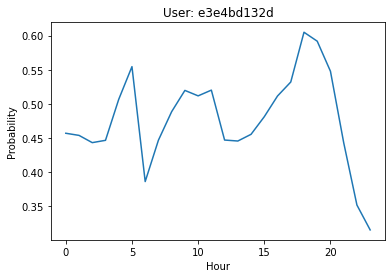

In [116]:
plot_user_probabilities("e3e4bd132d")

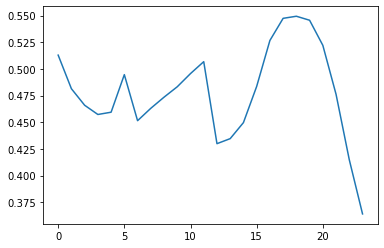

In [117]:
#Plot mean house-presence probabilites per hour for all users
agg_df = probability_df.groupby(by = "hour").mean()
plt.plot(agg_df.index, agg_df["prob_presence"])